In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import warnings
from nrclex import NRCLex
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("../data/philosophy_data.csv")
data.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [5]:
author = ['Plato', 'Aristotle']
data_filtered = data[data["author"].isin(author)]
data_filtered.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


# EDA (Exploratory Data Analysis)

count    87145.000000
mean       136.368948
std         91.274981
min         20.000000
25%         70.000000
50%        116.000000
75%        181.000000
max       1460.000000
Name: sentence_length, dtype: float64


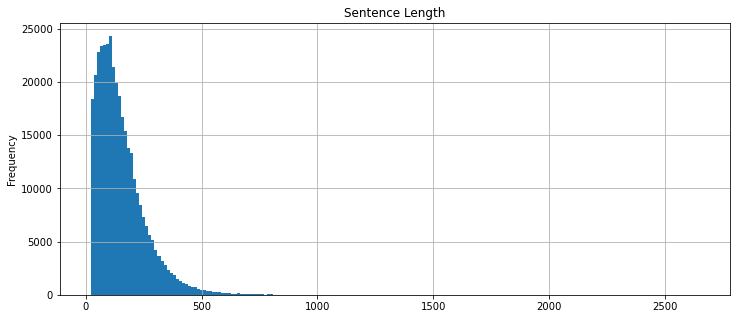

In [6]:
# sentence length
print(data_filtered.sentence_length.describe())

plt.figure(figsize=(12,5))
data.sentence_length.plot(kind='hist', bins=200)
plt.title('Sentence Length')
plt.grid()
plt.show()

In [7]:
schools = data_filtered.school.unique().tolist()
print(schools)

['plato', 'aristotle']


School =  PLATO :


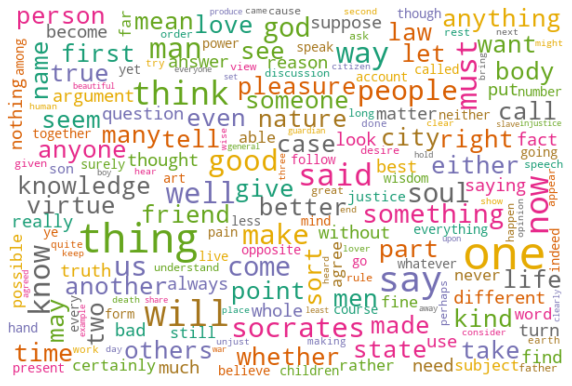

School =  ARISTOTLE :


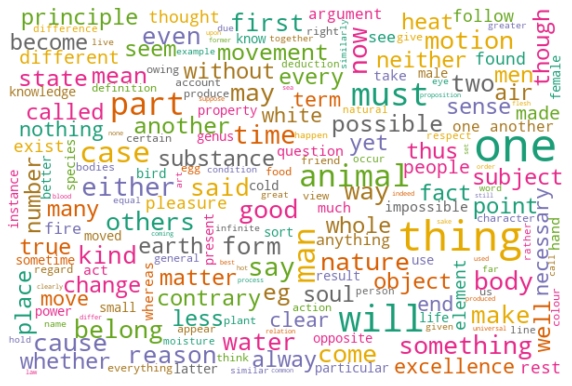

In [8]:
stopwords = set(STOPWORDS)

for sc in schools:
    data_temp = data_filtered[data_filtered.school==sc]  
    print('School = ', sc.upper(), ':')   
    # render wordcloud
    text = " ".join(txt for txt in data_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=200,
                          width = 600, height = 400,colormap="Dark2",
                          background_color="white").generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

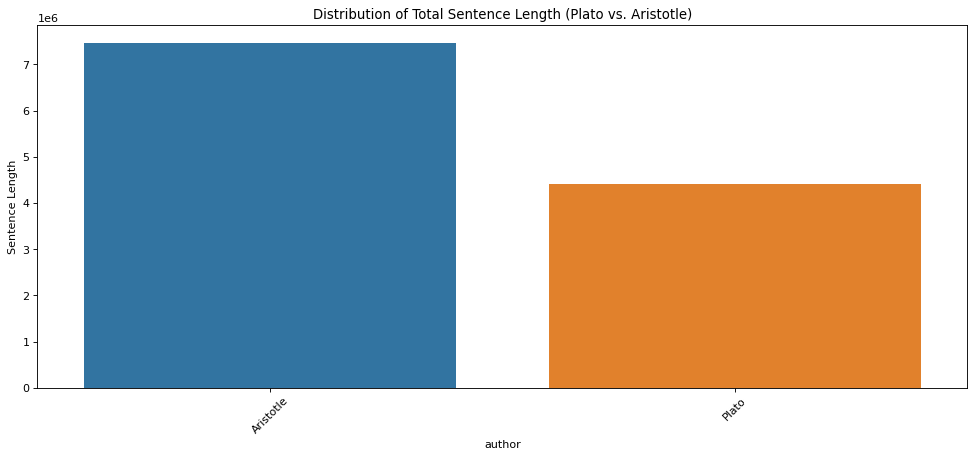

In [9]:
author_length = data_filtered.groupby("author").sum("sentence_length").sort_values(by=['sentence_length'], ascending = False)
author_length["author"] = list(author_length.index)
figure(figsize=(15, 6), dpi=80)
sns.barplot(data = author_length, x = "author", y = "sentence_length")
plt.xticks(rotation=45)
plt.ylabel("Sentence Length")
plt.title("Distribution of Total Sentence Length (Plato vs. Aristotle)")
plt.show()

# Sentiment Analysis

In [10]:
#Define data back to df for functionality and reproduceability 
df = data_filtered

In [11]:
#NRCLex will measure emotional affect from a body of text
import time
start_time = time.time()
senti_list = []
for i in range(len(df.sentence_lowered)):
    senti_list.append(NRCLex(df.sentence_lowered[i]))

In [12]:
#Detailing of emotions generated by NRClex
senti_detail = [senti_list[i].affect_frequencies for i in range(len(senti_list))]
fear = [senti_detail[i]["fear"] for i in range(len(senti_detail))]
anger = [senti_detail[i]["anger"] for i in range(len(senti_detail))]
anticip = [senti_detail[i]["anticip"] for i in range(len(senti_detail))]
trust = [senti_detail[i]["trust"] for i in range(len(senti_detail))]
surprise = [senti_detail[i]["surprise"] for i in range(len(senti_detail))]
positive = [senti_detail[i]["positive"] for i in range(len(senti_detail))]
negative = [senti_detail[i]["negative"] for i in range(len(senti_detail))]
sadness = [senti_detail[i]["sadness"] for i in range(len(senti_detail))]
disgust = [senti_detail[i]["disgust"] for i in range(len(senti_detail))]
joy = [senti_detail[i]["joy"] for i in range(len(senti_detail))]

In [13]:
df["fear"] = fear
df["anger"] = anger
df["anticip"] = anticip
df["trust"] = trust
df["surprise"] = surprise
df["positive"] = positive
df["negative"] = negative
df["sadness"] = sadness
df["disgust"] = disgust
df["joy"] = joy

In [14]:
df

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,...,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...",...,0.100000,0.1,0.0,0.100000,0.100000,0.200000,0.100000,0.100000,0.00,0.000000
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00,0.000000
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",...,0.250000,0.0,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.25,0.000000
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...",...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87140,Aristotle - Complete Works,Aristotle,aristotle,"; which is a great advantage, since the more c...","; which is a great advantage, since the more c...",-320,1991,137,"; which is a great advantage, since the more c...","['which', 'is', 'great', 'advantage', 'since',...",...,0.000000,0.0,0.0,0.000000,0.000000,0.400000,0.200000,0.000000,0.00,0.200000
87141,Aristotle - Complete Works,Aristotle,aristotle,"consider the Oedipus of Sophocles, for instanc...","consider the Oedipus of Sophocles, for instanc...",-320,1991,118,"consider the oedipus of sophocles, for instanc...","['consider', 'the', 'oedipus', 'of', 'sophocle...",...,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
87142,Aristotle - Complete Works,Aristotle,aristotle,There is less unity in the imitation of the ep...,There is less unity in the imitation of the ep...,-320,1991,308,there is less unity in the imitation of the ep...,"['there', 'is', 'less', 'unity', 'in', 'the', ...",...,0.000000,0.0,0.0,0.333333,0.000000,0.444444,0.111111,0.000000,0.00,0.000000
87143,Aristotle - Complete Works,Aristotle,aristotle,"In saying that there is less unity in an epic,...","In saying that there is less unity in an epic,...",-320,1991,333,"in saying that there is less unity in an epic,...","['in', 'saying', 'that', 'there', 'is', 'less'...",...,0.000000,0.0,0.0,0.250000,0.000000,0.583333,0.000000,0.000000,0.00,0.083333


In [15]:
school_list = list(df.school.value_counts().index)
senti_types = ["fear","anger","anticip","trust","surprise","sadness","disgust","joy"]
school_group = df.groupby("school").mean(senti_types)

In [16]:
count_lists = []
sentiment_lists = []
for school_1 in school_list:
    count_list = []
    sentiment_list = []
    school_1_data = df[df.school == school_1].reset_index()
    for school_2 in school_list:
        count = 0
        positive = 0
        for i in range(school_1_data.shape[0]):
            if (school_1_data.sentence_lowered[i].find(school_2) != -1):
                count += 1
                if school_1_data.positive[i] > school_1_data.negative[i]:
                    positive += school_1_data.positive[i]
                elif school_1_data.positive[i] == school_1_data.negative[i]:
                    positive += 0
                else:
                    positive -= school_1_data.negative[i]
        count_list.append(count)
        sentiment_list.append(positive)
    count_lists.append(count_list)
    sentiment_lists.append(sentiment_list)

In [17]:
mention_df = pd.DataFrame(count_lists)
mention_df.columns = school_list
mention_df.index = school_list
mention_df['sum'] = mention_df.apply(sum, axis = 1)
mention_df.loc['sum',:] = mention_df.apply(sum, axis = 0)

In [18]:
mention_df

,aristotle,plato,sum
aristotle,0.0,74.0,74.0
plato,0.0,30.0,30.0
sum,0.0,104.0,104.0


In [19]:
positive_df = pd.DataFrame(sentiment_lists)
positive_df.columns = school_list 
positive_df.index = school_list 
for i in range(positive_df.shape[0]):
    for j in range(positive_df.shape[1]):
        if mention_df.iloc[i,j] >= 10:
            positive_df.iloc[i,j] = positive_df.iloc[i,j]/mention_df.iloc[i,j]
        else:
            positive_df.iloc[i,j] = 0
positive_df

,aristotle,plato
aristotle,0,0.166508
plato,0,0.296731


<AxesSubplot:>

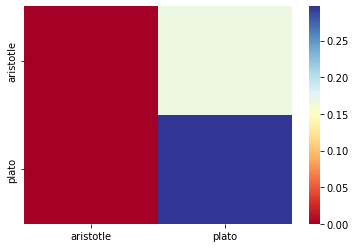

In [20]:
sns.heatmap(positive_df, cmap="RdYlBu")

In [21]:
def verifyAttitude(school_1, school_2, num_sentences):
    count = 0
    school_1_data = df[df.school == school_1].reset_index()
    for i in range(school_1_data.shape[0]):
        if count >= num_sentences:
            break
        else:
            if school_1_data.sentence_lowered[i].count(school_2)>0:
                if school_1_data.positive[i] > school_1_data.negative[i]:
                    print(school_1_data.sentence_lowered[i])
                    print("Positive", school_1_data.positive[i])
                    print("--")
                    count += 1
                if school_1_data.positive[i] < school_1_data.negative[i]:
                    print(school_1_data.sentence_lowered[i])
                    print("Negative", school_1_data.negative[i])
                    print("--")
                    count += 1

In [22]:
verifyAttitude("aristotle", "plato", 30)

now whether there is also another type of understanding we shall say later; but see plato, meno.
Positive 0.5
--
moreover, see whether he has placed the genus inside the species, eg by taking contact to be essentially continuity, or mixture essentially fusion, or, as in plato's definition, change of place to be locomotion.
Positive 0.6666666666666666
--
compare plato's 'great and small' except that he makes these his matter, the one his form, while the others treat the one which underlies as matter and the contraries as differentiae, ie forms.)
Negative 0.18181818181818182
--
some, as the pythagoreans and plato, make the infinite a principle as a substance in its own right, and not as an accident of some other thing.
Positive 0.3333333333333333
--
plato, on the other hand, holds that there is no body outside (the forms are not outside, because they are nowhere), yet that the infinite is present not only in the objects of sense but in the forms also.
Positive 0.42857142857142855
--
but 

In [23]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['sentence_str']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [ ]:
df['tokens'] = tokens
df['tokens']

# Topic Modelling on Plato 

In [ ]:
author = ['Plato']
df_plato = df[df["author"].isin(author)]

In [ ]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df_plato['tokens'])

In [ ]:
print(dictionary.token2id)

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df_plato['tokens']]

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df_plato['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=3, workers = 4, passes=100)

In [ ]:
lda_model.print_topics(-1)

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# Topic Modelling on Aristotle

In [ ]:
author = ['Aristotle']
df_aristotle = df[df["author"].isin(author)]

In [ ]:
dictionary_2 = Dictionary(df_aristotle['tokens'])

In [ ]:
print(dictionary_2.token2id)

In [ ]:
dictionary_2.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df_aristotle['tokens']]

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df_aristotle['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=6, workers = 4, passes=100)